In [336]:
# *LOGISTIC REGRESSION - HEART DISEASE PREDICTION

# ***Introduction
# World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. 
# Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 
# The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in 
# turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as 
# predict the overall risk using logistic regression


# Data Preparation

# ***Source
# The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the 
# town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future 
# coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.


# Variables
# Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

# ***Demographic:
# • Sex: male or female(Nominal)
# • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age
# is continuous)

# ***Behavioral
# • Current Smoker: whether or not the patient is a current smoker (Nominal)
# • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one
# can have any number of cigarettes, even half a cigarette.)

# ***Medical( history)
# • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
# • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
# • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
# • Diabetes: whether or not the patient had diabetes (Nominal)

# ***Medical(current)
# • Tot Chol: total cholesterol level (Continuous)
# • Sys BP: systolic blood pressure (Continuous)
# • Dia BP: diastolic blood pressure (Continuous)
# • BMI: Body Mass Index (Continuous)
# • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
# • Glucose: glucose level (Continuous)

# ***Predict variable (desired target)
# • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [338]:
# reading csv
heart_data = pd.read_csv('framingham.csv')
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [339]:
heart_data.shape

(4238, 16)

In [340]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [341]:
heart_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Step-2 Data Cleaning 

### Data Substitutions and make a meaning full values for our EDA

In [342]:
heart_data = heart_data.rename(columns = {'male':'Sex'})

In [343]:
heart_data['Sex'] = heart_data['Sex'].apply(lambda x: 'Male' if x == 0 else 'Female')# male=0 ,female=1

In [344]:
heart_data['currentSmoker'] = heart_data['currentSmoker'].apply(lambda x :'Yes' if x==1 else 'No') #yes=1,no=0

In [345]:
heart_data['prevalentStroke']=heart_data['prevalentStroke'].apply(lambda x :'Yes' if x==1 else 'No') # yes=1,no=0

In [346]:
heart_data['BPMeds']=heart_data['BPMeds'].apply(lambda x :'Yes' if x==1 else 'No')#yes=1,no=0

In [347]:
heart_data['prevalentHyp']=heart_data['prevalentHyp'].apply(lambda x :'Yes' if x==1 else 'No')#yes=1,no=0

In [348]:
heart_data['diabetes']=heart_data['diabetes'].apply(lambda x :'Yes' if x==1 else 'No')#yes=1,no=0

In [349]:
heart_data['TenYearCHD']=heart_data['TenYearCHD'].apply(lambda x :'Yes' if x==1 else 'No')#yes=1,no=0

In [350]:
heart_data.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Female,39,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Male,46,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Female,48,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Male,61,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,Male,46,3.0,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No


### Missing Value,NaN value Treatement for accuracy

In [351]:
percent_missing =(heart_data.isnull().sum() *100)/len(heart_data)
percent_missing

Sex                0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [352]:
heart_data.isnull().sum()

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [353]:
# education is irrevelant to our analysis hence we are dropping it
heart_data = heart_data.drop('education',axis=1)

In [354]:
heart_data['cigsPerDay'].value_counts()

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

In [355]:
heart_data['cigsPerDay'].fillna(heart_data['cigsPerDay'].mode()[0] ,inplace = True)

In [356]:
heart_data['totChol'].value_counts()

240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
392.0     1
405.0     1
359.0     1
398.0     1
119.0     1
Name: totChol, Length: 248, dtype: int64

In [357]:
heart_data['totChol'].fillna(heart_data['totChol'].mode()[0] ,inplace = True)

In [358]:
heart_data.isnull().sum()

Sex                  0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [359]:
heart_data['BMI'].fillna(heart_data['BMI'].mode()[0] ,inplace = True)

In [360]:
heart_data['glucose'].value_counts()

75.0     193
77.0     167
73.0     156
80.0     152
70.0     152
        ... 
386.0      1
155.0      1
147.0      1
205.0      1
260.0      1
Name: glucose, Length: 143, dtype: int64

In [361]:
heart_data['glucose'].fillna(heart_data['glucose'].mode()[0] ,inplace = True)

In [362]:
heart_data['heartRate'].value_counts()

75.0     563
80.0     385
70.0     305
60.0     231
85.0     227
        ... 
47.0       1
130.0      1
140.0      1
51.0       1
46.0       1
Name: heartRate, Length: 73, dtype: int64

In [363]:
heart_data['heartRate'].fillna(heart_data['heartRate'].mode()[0] ,inplace = True)

In [364]:
heart_data.isnull().sum()

Sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### if we want we can leave the NaN values and do our predictions It won't affect that much.But to predict more accurately I treated the missing value first.

## Step -3 Data Visualization

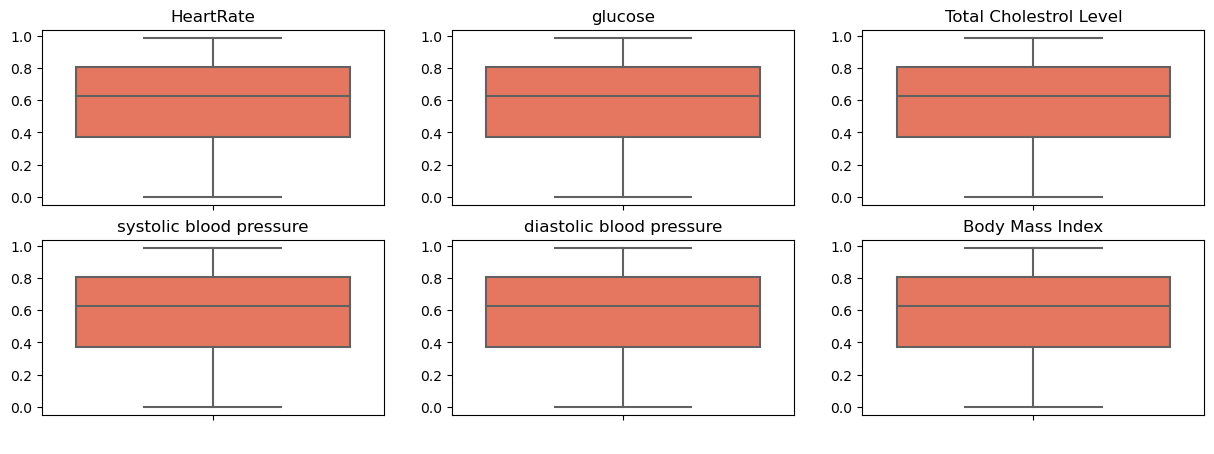

In [365]:
# Boxplot for all continous variables [Numerical Variables]
plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
sns.boxplot(heart_data['heartRate'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="HeartRate" , 
                                                                                             xlabel=" ")

plt.subplot(2,3,2)
sns.boxplot(heart_data['glucose'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="glucose" , 
                                                                                             xlabel="  ")

plt.subplot(2,3,3)
sns.boxplot(heart_data['totChol'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="Total Cholestrol Level" , 
                                                                                             xlabel="  ")

plt.subplot(2,3,4)
sns.boxplot(heart_data['sysBP'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="systolic blood pressure" , 
                                                                                             xlabel=" ")

plt.subplot(2,3,5)
sns.boxplot(heart_data['diaBP'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="diastolic blood pressure" , 
                                                                                             xlabel=" ")

plt.subplot(2,3,6)
sns.boxplot(heart_data['BMI'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="Body Mass Index" , 
                                                                                             xlabel="  ")

plt.show()

#### Overall if we see Heartrate ,gulcose , Total Cholestrol Level ,systolic or diastolic blood pressure and Body Mass Index all are very well maintain the same levels, it ranges in between 40% to 80% .So we can say a patient is having a heart problem he is defenitely have these level nearly or more than 80%

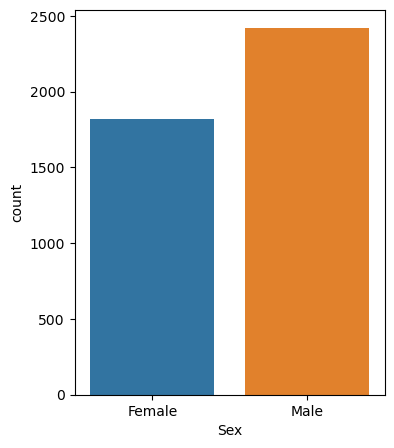

In [366]:
plt.figure(figsize=(4,5))
sns.countplot(heart_data,x = heart_data.Sex)
plt.xlabel('Sex')
plt.show()

#### Males are more suspected to heart attack as compared to females.

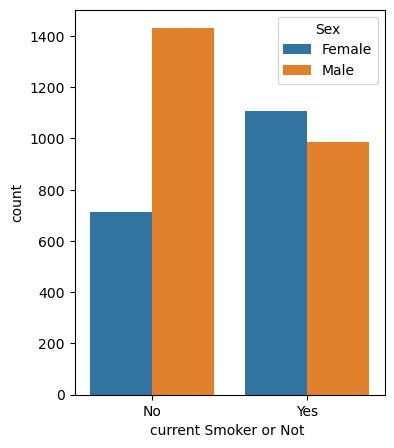

In [367]:
plt.figure(figsize=(4,5))
sns.countplot(heart_data,x = heart_data.currentSmoker , hue = heart_data.Sex)
plt.xlabel('current Smoker or Not ')
plt.show()

#### Maximum men were currently smoking as compared to females

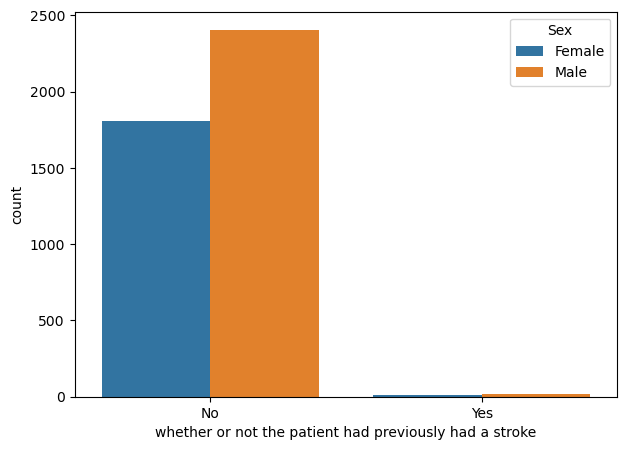

In [368]:
plt.figure(figsize=(7,5))
sns.countplot(heart_data,x = heart_data.prevalentStroke , hue = heart_data.Sex)
plt.xlabel('whether or not the patient had previously had a stroke')
plt.show()

#### Very very less people got a stroke previously.Both male and female have a equal chances of getting a stroke previously.

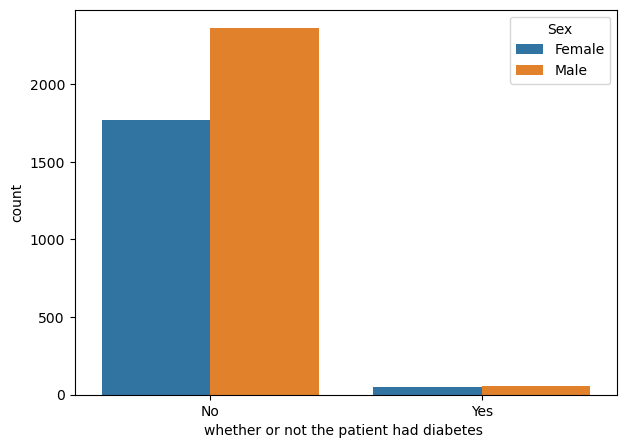

In [369]:
plt.figure(figsize=(7,5))
sns.countplot(heart_data,x = heart_data.diabetes , hue = heart_data.Sex)
plt.xlabel('whether or not the patient had diabetes ')
plt.show()

#### Male and Female are having equal chances of getting diabetes.

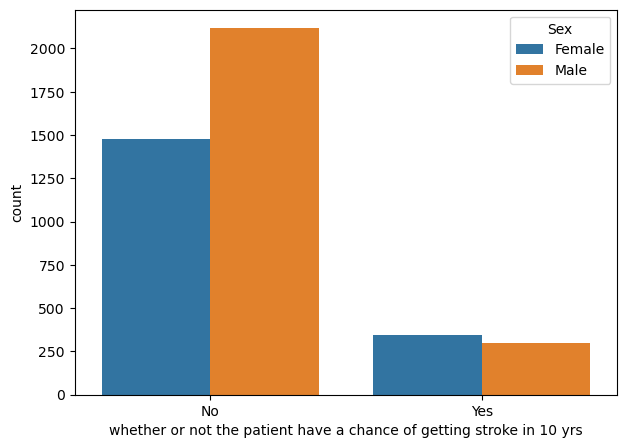

In [370]:
plt.figure(figsize=(7,5))
sns.countplot(heart_data,x = heart_data.TenYearCHD , hue = heart_data.Sex)
plt.xlabel('whether or not the patient have a chance of getting stroke in 10 yrs')
plt.show()

#### More or less Male or Female are both equally likely to get a stroke in 10 yrs.If they don't opt a healthy lifestyle.

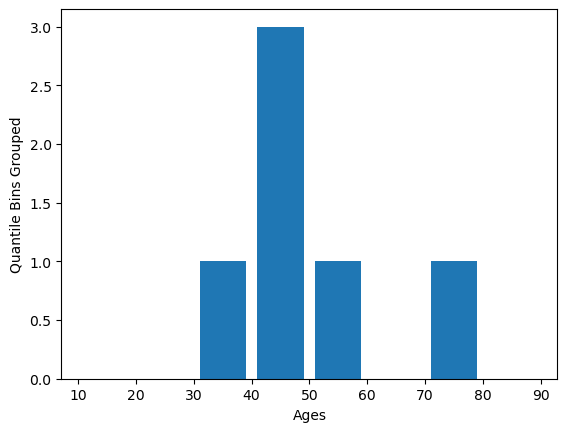

In [371]:
bins = [10,20,30,40,50,60,70,80,90]
plt.hist(heart_data['age'].describe(), bins, histtype='bar', rwidth=0.8)
plt.xlabel('Ages')
plt.ylabel('Quantile Bins Grouped')
plt.show()

#### Person having a age in between 40-50 are having more chances of getting a heart attack , Than people in between 70-80.

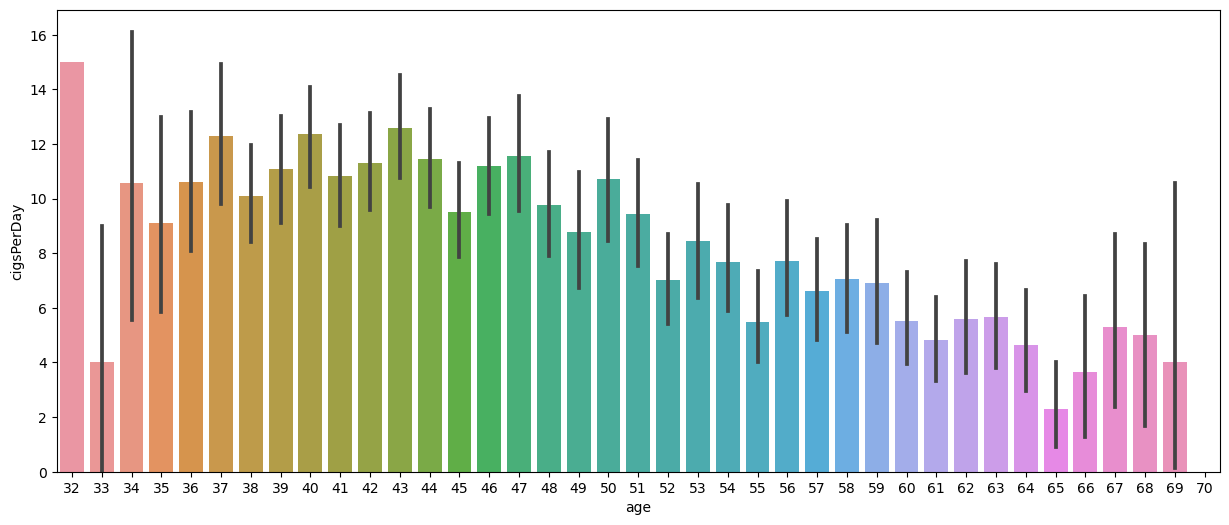

In [372]:
plt.figure(figsize=(15,6))
sns.barplot(x='age',y='cigsPerDay',data=heart_data)
plt.show()

#### From this we can see that youger people are more addicted to ciggerates than oder people.Hence they get a maximum chance of getting heart problems in early life.

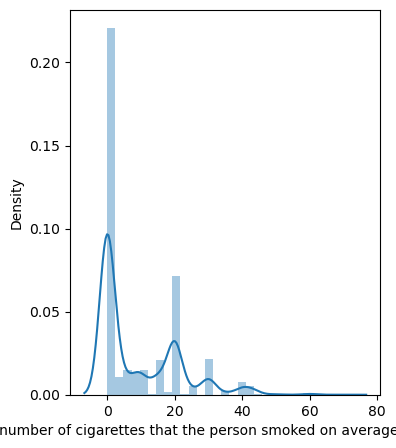

In [373]:
plt.figure(figsize=(4,5))
sns.distplot(heart_data.cigsPerDay)
plt.xlabel('the number of cigarettes that the person smoked on average in one day.')
plt.show()

#### On an average a person is taking 10 ciggrates in a day as per analysis,which is not at a good sign.

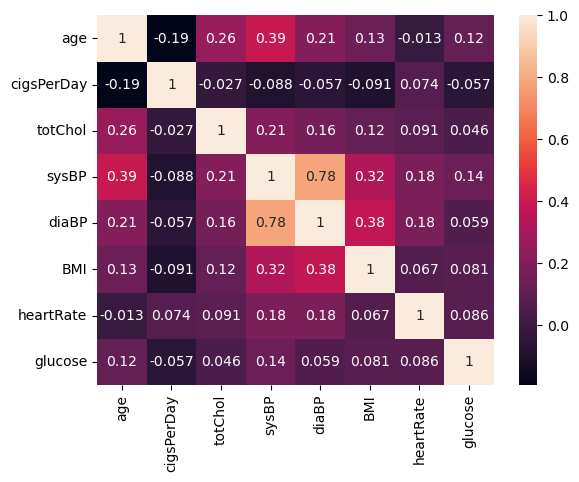

In [374]:
sns.heatmap(heart_data.corr(),annot = True)
plt.show()

In [375]:
heart_data.head(10)

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Female,39,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Male,46,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Female,48,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Male,61,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,Male,46,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No
5,Male,43,No,0.0,No,No,Yes,No,228.0,180.0,110.0,30.30,77.0,99.0,No
6,Male,63,No,0.0,No,No,No,No,205.0,138.0,71.0,33.11,60.0,85.0,Yes
7,Male,45,Yes,20.0,No,No,No,No,313.0,100.0,71.0,21.68,79.0,78.0,No
8,Female,52,No,0.0,No,No,Yes,No,260.0,141.5,89.0,26.36,76.0,79.0,No
9,Female,43,Yes,30.0,No,No,Yes,No,225.0,162.0,107.0,23.61,93.0,88.0,No


## Step-4 Data Preparation for Model Building

In [376]:
# yes=1,no=0,  # male=0 ,female=1
varlist = ['currentSmoker','prevalentStroke','BPMeds','prevalentHyp','diabetes','TenYearCHD']

In [377]:
heart_data['currentSmoker']=heart_data['currentSmoker'].map({'Yes':1,'No':0})

In [378]:
heart_data['prevalentStroke']=heart_data['prevalentStroke'].map({'Yes':1,'No':0})

In [379]:
heart_data['BPMeds']=heart_data['BPMeds'].map({'Yes':1,'No':0})

In [380]:
heart_data['prevalentHyp']=heart_data['prevalentHyp'].map({'Yes':1,'No':0})

In [381]:
heart_data['diabetes']=heart_data['diabetes'].map({'Yes':1,'No':0})

In [382]:
heart_data['TenYearCHD']=heart_data['TenYearCHD'].map({'Yes':1,'No':0})

In [383]:
heart_data['Sex']=heart_data['Sex'].map({'Female':1,'Male':0})

In [384]:
heart_data.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Checking for outliers

In [385]:
# Checking for outliers in the continuous variables
check_for_outliers = heart_data[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [386]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
check_for_outliers.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,8.941482,236.760264,132.352407,82.893464,25.785814,75.878716,81.328929
std,11.902399,44.327866,22.038097,11.910850,4.078100,12.025185,22.924837
min,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,0.000000,206.000000,117.000000,75.000000,23.050000,68.000000,72.000000
50%,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000
75%,20.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000
90%,25.000000,292.000000,162.000000,98.000000,30.763000,92.000000,97.000000
95%,30.000000,312.000000,175.000000,104.575000,32.771500,98.000000,107.000000
99%,43.000000,353.630000,200.000000,118.000000,38.952600,110.000000,170.000000


#### From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

## Step-4 TEST and TRAIN Split

In [387]:
from sklearn.model_selection import train_test_split

In [388]:
# Putting feature variable to X
X = heart_data.drop(['TenYearCHD'], axis=1)

X.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [389]:
# Putting response variable to y
y = heart_data['TenYearCHD']

y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [390]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [391]:
from sklearn.preprocessing import StandardScaler

In [392]:
scaler = StandardScaler()

X_train[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']] = scaler.fit_transform(X_train[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']])

X_train.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1793,1,56,1,0.912076,0,0,0,0,-1.063380,-0.564153,-1.086904,-1.086667,-0.468457,-0.482810
177,0,61,1,0.912076,0,0,0,0,-0.173743,-0.474385,0.002076,-0.093275,0.195237,-0.860539
260,1,52,0,-0.756936,0,0,1,1,0.070907,0.602832,0.504682,-0.304740,-0.966228,-0.356900
3076,0,43,1,0.077570,0,0,0,0,0.715894,0.288644,1.091056,-0.356377,0.112275,-0.440840
1889,0,65,0,-0.756936,0,0,0,0,1.138471,0.602832,0.965405,0.174744,0.361161,-0.314930


In [393]:
### Checking the TenYearCHD Rate
hdata = (sum(heart_data['TenYearCHD'])/len(heart_data['TenYearCHD'].index))*100
hdata

15.19584709768759

We have almost 15% possiblity of patients getting heart problems.

## Step 6: Looking at Correlations

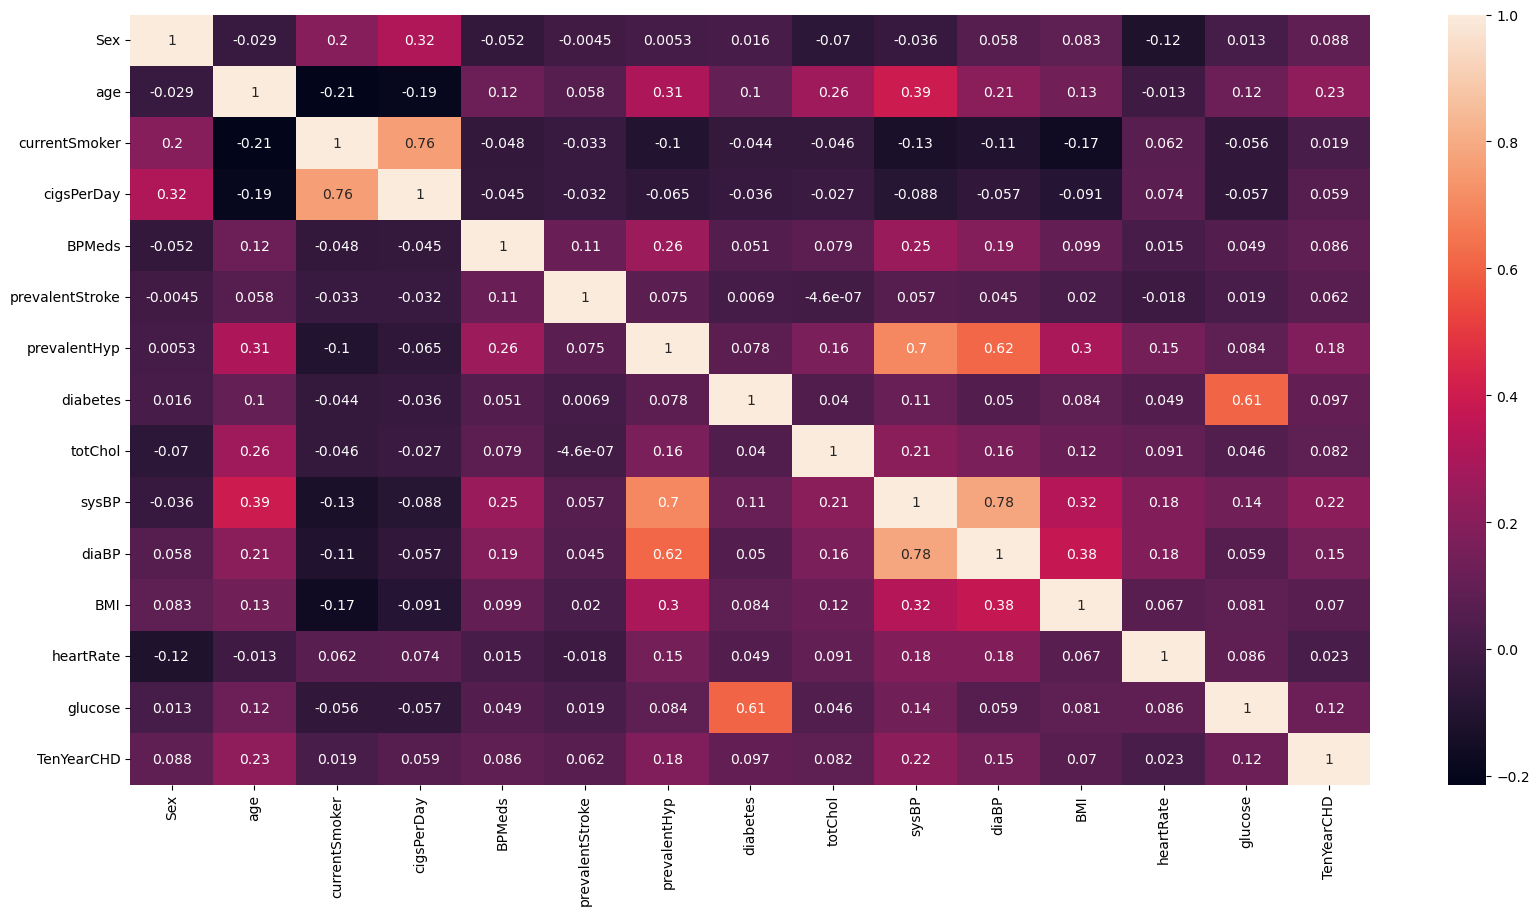

In [394]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(heart_data.corr(),annot = True)
plt.show()

## Step 7: Model Building

#### Let's start by splitting our data into a training set and a test set.

### Running Your First Training Model

In [395]:
import statsmodels.api as sm

In [396]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2966
Model:                            GLM   Df Residuals:                     2951
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1104.6
Date:                Tue, 08 Aug 2023   Deviance:                       2209.3
Time:                        19:26:07   Pearson chi2:                 2.91e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.09577
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.7119      0.418    -13.678      0.000      -6.530      -4.893
Sex                 0.4484      0.121      3.718      0.000       0.212       0.685
age                 0.0678      0.008      9.028      0.000       0.053       0.083
currentSmoker       0.0721      0.173      0.418      0.676      -0.266       0.411
cigsPerDay          0.2277      0.082      2.768      0.006       0.066       0.389
BPMeds              0.1656      0.253      0.655      0.512      -0.330       0.661
prevalentStroke     0.6517      0.523      1.246      0.213      -0.374       1.677
prevalentHyp        0.2747      0.155      1.771      0.077      -0.029       0.579
diabetes            0.3648      0.341      1.070      0.285      -0.304       1.033
totChol             0.0779      0.054      1.431      0.152      -0.029       0.185
sysBP               0.3366      0.093      3.630      0.000       0.155       0.518
diaBP              -0.0761      0.086     -0.887      0.375      -0.244       0.092
BMI                 0.0363      0.058      0.630      0.529      -0.077       0.149
heartRate           0.0004      0.056      0.008      0.994      -0.110       0.111
glucose             0.1223      0.059      2.072      0.038       0.007       0.238
===================================================================================
"""

## Step 8: Feature Selection Using RFE

In [397]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [398]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step =10)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [399]:
rfe.support_

array([ True, False, False,  True,  True,  True,  True,  True, False,
        True, False, False, False, False])

In [400]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Sex', True, 1),
 ('age', False, 2),
 ('currentSmoker', False, 2),
 ('cigsPerDay', True, 1),
 ('BPMeds', True, 1),
 ('prevalentStroke', True, 1),
 ('prevalentHyp', True, 1),
 ('diabetes', True, 1),
 ('totChol', False, 2),
 ('sysBP', True, 1),
 ('diaBP', False, 2),
 ('BMI', False, 2),
 ('heartRate', False, 2),
 ('glucose', False, 2)]

In [401]:
col = X_train.columns[rfe.support_]
col

Index(['Sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'sysBP'],
      dtype='object')

In [402]:
X_train.columns[~rfe.support_]

Index(['age', 'currentSmoker', 'totChol', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

##### Assessing the model with StatsModels

In [403]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2966
Model:                            GLM   Df Residuals:                     2958
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1157.3
Date:                Tue, 08 Aug 2023   Deviance:                       2314.7
Time:                        19:26:07   Pearson chi2:                 2.93e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.06306
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2137      0.095    -23.250      0.000      -2.400      -2.027
Sex                 0.4338      0.114      3.792      0.000       0.210       0.658
cigsPerDay          0.1312      0.053      2.454      0.014       0.026       0.236
BPMeds              0.2287      0.248      0.923      0.356      -0.257       0.715
prevalentStroke     0.8397      0.517      1.625      0.104      -0.173       1.853
prevalentHyp        0.3244      0.149      2.181      0.029       0.033       0.616
diabetes            0.9762      0.250      3.898      0.000       0.485       1.467
sysBP               0.4578      0.068      6.744      0.000       0.325       0.591
===================================================================================
"""

In [404]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1793    0.128041
177     0.090206
260     0.424927
3076    0.111914
1889    0.115370
567     0.335049
515     0.166561
3287    0.090215
3786    0.188528
1240    0.149648
dtype: float64

In [405]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12804058, 0.09020591, 0.42492658, 0.11191378, 0.11537045,
       0.33504904, 0.16656085, 0.0902152 , 0.18852821, 0.14964785])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [406]:
y_train_pred_final = pd.DataFrame({'TenYearCHD':y_train.values, 'TenYearCHD_Prob':y_train_pred})
# y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,TenYearCHD,TenYearCHD_Prob
0,0,0.128041
1,0,0.090206
2,0,0.424927
3,0,0.111914
4,0,0.115370


#### Creating new column 'predicted' with 1 if TenYearCHD_Prob > 0.5 else 0

In [407]:
y_train_pred_final['predicted'] = y_train_pred_final.TenYearCHD_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,TenYearCHD,TenYearCHD_Prob,predicted
0,0,0.128041,0
1,0,0.090206,0
2,0,0.424927,0
3,0,0.111914,0
4,0,0.115370,0


In [408]:
from sklearn import metrics

In [409]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.TenYearCHD, y_train_pred_final.predicted )
print(confusion)

[[2503   18]
 [ 420   25]]


In [410]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.TenYearCHD, y_train_pred_final.predicted))

0.8523263654753878


#### Checking VIFs

In [411]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [412]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,prevalentHyp,2.03
6,sysBP,1.66
0,Sex,1.38
2,BPMeds,1.15
1,cigsPerDay,1.09
5,diabetes,1.04
3,prevalentStroke,1.03


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Let's take a look at the confusion matrix again 

In [413]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.TenYearCHD, y_train_pred_final.predicted )
confusion

array([[2503,   18],
       [ 420,   25]], dtype=int64)

In [414]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.TenYearCHD, y_train_pred_final.predicted)

0.8523263654753878

## Metrics beyond simply accuracy

In [415]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [416]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.056179775280898875

In [417]:
# Let us calculate specificity
TN / float(TN+FP)

0.9928599761999206

In [418]:
# Calculate false postive rate - predicting TenYearCHD
print(FP/ float(TN+FP))

0.007140023800079333


In [419]:
# positive predictive value 
print (TP / float(TP+FP))

0.5813953488372093


In [420]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8563120082107424


In [421]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',(TP / float(TP+FN))/(1-(TP / float(TP+FN))),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-(TP / float(TP+FN)))/(TN / float(TN+FP)))

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8523263654753878 
 The Missclassification = 1-Accuracy =  0.14767363452461224 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.056179775280898875 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9928599761999206 
 Positive Predictive value = TP/(TP+FP) =  0.5813953488372093 
 Negative predictive Value = TN/(TN+FN) =  0.8563120082107424 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  0.05952380952380952 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9506075855041366


### Step 9: Plotting the ROC Curve

In [422]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [423]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.TenYearCHD, y_train_pred_final.TenYearCHD_Prob, drop_intermediate = False )

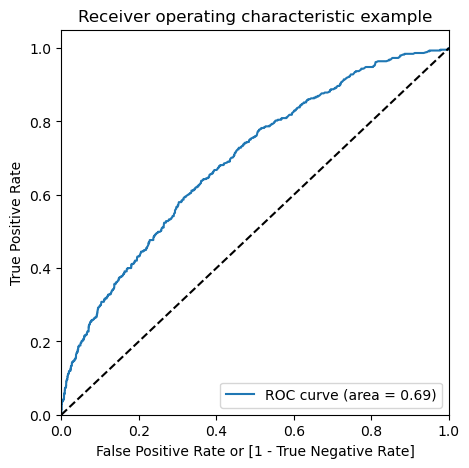

In [424]:
draw_roc(y_train_pred_final.TenYearCHD, y_train_pred_final.TenYearCHD_Prob)

## Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [425]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.TenYearCHD_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,TenYearCHD,TenYearCHD_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.128041,0,1,1,0,0,0,0,0,0,0,0
1,0,0.090206,0,1,0,0,0,0,0,0,0,0,0
2,0,0.424927,0,1,1,1,1,1,0,0,0,0,0
3,0,0.111914,0,1,1,0,0,0,0,0,0,0,0
4,0,0.115370,0,1,1,0,0,0,0,0,0,0,0


In [426]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.TenYearCHD, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.150034  1.000000  0.000000
0.1   0.1  0.478085  0.811236  0.419278
0.2   0.2  0.757586  0.404494  0.819913
0.3   0.3  0.832771  0.204494  0.943673
0.4   0.4  0.851315  0.112360  0.981753
0.5   0.5  0.852326  0.056180  0.992860
0.6   0.6  0.852326  0.020225  0.999207
0.7   0.7  0.850978  0.006742  1.000000
0.8   0.8  0.850303  0.002247  1.000000
0.9   0.9  0.849966  0.000000  1.000000


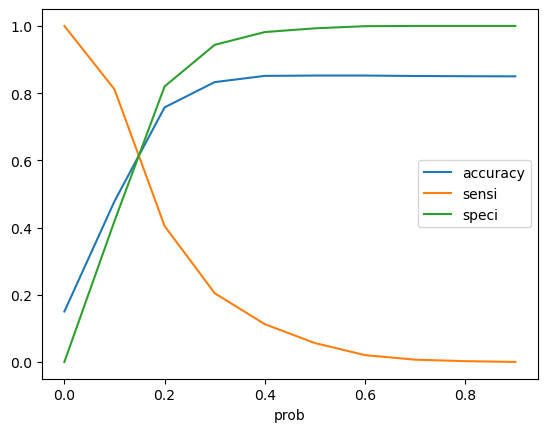

In [427]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [428]:
y_train_pred_final['final_predicted'] = y_train_pred_final.TenYearCHD_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,TenYearCHD,TenYearCHD_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.128041,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.090206,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.424927,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.111914,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.115370,0,1,1,0,0,0,0,0,0,0,0,0


In [429]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.TenYearCHD, y_train_pred_final.final_predicted)

0.8327714093054619

In [430]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.TenYearCHD, y_train_pred_final.final_predicted )
confusion2

array([[2379,  142],
       [ 354,   91]], dtype=int64)

In [431]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [432]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.20449438202247192

In [433]:
# Let us calculate specificity
TN / float(TN+FP)

0.9436731455771519

In [434]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05632685442284808


In [435]:
# Positive predictive value 
print (TP / float(TP+FP))

0.3905579399141631


In [436]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8704720087815587


## Precision and Recall

In [437]:
confusion = metrics.confusion_matrix(y_train_pred_final.TenYearCHD, y_train_pred_final.predicted )
confusion

array([[2503,   18],
       [ 420,   25]], dtype=int64)

#### Precision
* Precision == TP / TP + FP

In [438]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.5813953488372093

#### Recall
* Recall == TP / TP + FN

In [439]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.056179775280898875

In [440]:
from sklearn.metrics import precision_score, recall_score

In [441]:
?precision_score

In [442]:
precision_score(y_train_pred_final.TenYearCHD, y_train_pred_final.predicted)

0.5813953488372093

In [443]:
recall_score(y_train_pred_final.TenYearCHD, y_train_pred_final.predicted)

0.056179775280898875

#### Precision and recall tradeoff

In [444]:
from sklearn.metrics import precision_recall_curve

In [445]:
y_train_pred_final.TenYearCHD, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 2961    0
 2962    0
 2963    0
 2964    0
 2965    0
 Name: TenYearCHD, Length: 2966, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 2961    0
 2962    0
 2963    0
 2964    0
 2965    1
 Name: predicted, Length: 2966, dtype: int64)

In [446]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.TenYearCHD, y_train_pred_final.TenYearCHD_Prob)

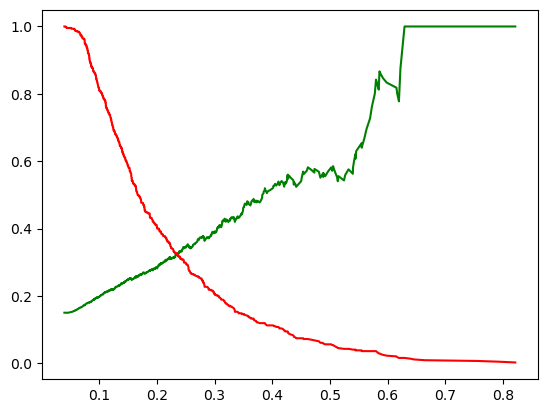

In [447]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the test set

In [448]:
X_test[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']] = scaler.transform(X_test[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']])

In [449]:
X_test = X_test[col]
X_test.head()

,Sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,sysBP
3207,1,0.912076,0,0,0,0,0.176434
263,1,-0.756936,0,0,1,0,0.647716
3200,0,0.912076,0,0,1,0,0.423296
1295,0,0.494823,0,0,0,0,-1.686254
3829,1,-0.756936,0,0,0,0,-0.003102


In [450]:
X_test_sm = sm.add_constant(X_test)

In [451]:

y_test_pred = res.predict(X_test_sm)

In [452]:
y_test_pred[:10]

3207    0.170883
263     0.221271
3200    0.171389
1295    0.051143
3829    0.132323
68      0.075417
2445    0.066189
2867    0.077594
2710    0.194860
721     0.385163
dtype: float64

In [453]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [454]:
# Let's see the head
y_pred_1.head()

,0
3207,0.170883
263,0.221271
3200,0.171389
1295,0.051143
3829,0.132323


In [455]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [456]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [457]:
y_pred_final

,TenYearCHD,0
3207,1,0.170883
263,0,0.221271
3200,0,0.171389
1295,0,0.051143
3829,0,0.132323
...,...,...
584,0,0.102640
417,0,0.158218
3046,0,0.085821
2599,0,0.189989


In [458]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'TenYearCHD_Prob'})

In [459]:
# Let's see the head of y_pred_final
y_pred_final.head()

,TenYearCHD,TenYearCHD_Prob
3207,1,0.170883
263,0,0.221271
3200,0,0.171389
1295,0,0.051143
3829,0,0.132323


In [469]:
y_pred_final['final_predicted'] = y_pred_final.TenYearCHD_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [470]:
y_pred_final.head()

,TenYearCHD,TenYearCHD_Prob,final_predicted
3207,1,0.170883,0
263,0,0.221271,0
3200,0,0.171389,0
1295,0,0.051143,0
3829,0,0.132323,0


In [471]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.TenYearCHD, y_pred_final.final_predicted)

0.839622641509434

In [472]:
confusion2 = metrics.confusion_matrix(y_pred_final.TenYearCHD, y_pred_final.final_predicted )
confusion2

array([[1062,   11],
       [ 193,    6]], dtype=int64)

In [473]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [474]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.03015075376884422

In [475]:
# Let us calculate specificity
TN / float(TN+FP)

0.9897483690587139

In [483]:
score = accuracy_score(y_pred_final.final_predicted,y_test)
score

0.839622641509434

In [484]:
### accuracy score
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_pred_final.final_predicted,y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1255
           1       0.03      0.35      0.06        17

    accuracy                           0.84      1272
   macro avg       0.51      0.60      0.48      1272
weighted avg       0.98      0.84      0.90      1272



In [485]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',
      
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',(TP / float(TP+FN))/(1-(TP / float(TP+FN))),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-(TP / float(TP+FN)))/(TN / float(TN+FP)))

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.839622641509434 
 The Missclassification = 1-Accuracy =  0.160377358490566 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.03015075376884422 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9897483690587139 
 Positive Predictive value = TP/(TP+FP) =  0.35294117647058826 
 Negative predictive Value = TN/(TN+FN) =  0.846215139442231 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  0.031088082901554404 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9798947657307252


### TAIN MODEL KEY FINDINDS:

 1.The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8523263654753878 </br>
 2.The Missclassification = 1-Accuracy =  0.14767363452461224 </br>
 3.Sensitivity or True Positive Rate = TP/(TP+FN) =  0.056179775280898875 </br>
 4.Specificity or True Negative Rate = TN/(TN+FP) =  0.9928599761999206 </br>
 5.Positive Predictive value = TP/(TP+FP) =  0.5813953488372093 </br>
 6.Negative predictive Value = TN/(TN+FN) =  0.8563120082107424 </br>
 7.Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  0.05952380952380952 </br>
 8.Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9506075855041366</br>

### TEST MODEL KEY FINDINGS:

 1.The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.839622641509434 </br>
 2.The Missclassification = 1-Accuracy =  0.160377358490566 </br>
 3.Sensitivity or True Positive Rate = TP/(TP+FN) =  0.03015075376884422 </br>
 4.Specificity or True Negative Rate = TN/(TN+FP) =  0.9897483690587139 </br>
 5.Positive Predictive value = TP/(TP+FP) =  0.35294117647058826 </br>
 6.Negative predictive Value = TN/(TN+FN) =  0.846215139442231 </br>
 7.Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  0.031088082901554404 </br>
 8.Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9798947657307252

#### CUT-OFF VAlue: - 0.3 we considered

### INSIGHTS:

#### Overall we can say we have a very good model with a accuray of 85%. And all other parameters also it works fine.List of Patients who may suffer from heart problems list as fallow

In [322]:
P = y_pred_final['final_predicted'] ## from test set

In [324]:
final_list = pd.DataFrame(P)

In [333]:
final_list.value_counts()

0    1255
1      17
Name: final_predicted, dtype: int64

#### Finally we can say 17 people may get a heart problem from the above given dataset.

final_list is our submission file 